In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors
import numpy as np
import glob
mpl.style.use('seaborn-talk')
import ROOT

Welcome to JupyROOT 6.16/00


In [2]:
%%cpp -d

#include "sPhenixStyle.C"
#include "SaveCanvas.C"
#include <TStyle.h>

In [3]:
%%cpp

SetsPhenixStyle();
gStyle->SetOptStat(0);
gStyle->SetOptFit(1111);
TVirtualFitter::SetDefaultFitter("Minuit2");

gSystem->Load("libg4eval.so");

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [4]:
base_dir = 'production-3-full-beam-full-magnet'

# base_dir = 'Scraper at z 350 cm'

In [5]:
df_facets= pd.read_csv(os.path.join(base_dir, 'Facet_CheckAll.csv'))
df_facets.set_index('Facet', inplace=True)
df_facets

,Flux,Phi
Facet,,
18964.0,2.700000e+15,0.423537
18965.0,6.220000e+15,0.257193
18966.0,5.280000e+15,0.059895
18967.0,5.280000e+15,-0.059974
18968.0,6.210000e+15,-0.257590
18982.0,1.620000e+15,-2.709813
18983.0,3.340000e+15,-2.897719
18984.0,2.320000e+16,-3.085536
18985.0,2.320000e+16,3.085618


In [6]:
df_facets.index.to_list()

[18964.0,
 18965.0,
 18966.0,
 18967.0,
 18968.0,
 18982.0,
 18983.0,
 18984.0,
 18985.0,
 18986.0,
 18987.0]

In [7]:
# facet = int(18966)

for facet_f in df_facets.index.to_list():
    facet = int(facet_f)
    filenames = glob.glob(os.path.join(base_dir, f'{facet}.[0-9]*.csv_SynRadAna.root'))
#     print(len(filenames))

    src_filenames=" ".join(filenames);
    joint_file = os.path.join(base_dir, f'{facet}_SUM.csv_SynRadAna.root')

    if (not os.path.exists(joint_file)):
        print(os.popen(f'hadd -f {joint_file} {src_filenames} ').read())
    else:
        print(os.popen(f'ls -lhv {joint_file} ').read())

-rw-r--r-- 1 jinhuang rhphenix 97K May 28 09:21 production-3-full-beam-full-magnet/18964_SUM.csv_SynRadAna.root

-rw-r--r-- 1 jinhuang rhphenix 98K May 28 09:21 production-3-full-beam-full-magnet/18965_SUM.csv_SynRadAna.root

-rw-r--r-- 1 jinhuang rhphenix 200K May 28 00:20 production-3-full-beam-full-magnet/18966_SUM.csv_SynRadAna.root

-rw-r--r-- 1 jinhuang rhphenix 199K May 28 09:21 production-3-full-beam-full-magnet/18967_SUM.csv_SynRadAna.root

-rw-r--r-- 1 jinhuang rhphenix 98K May 28 09:21 production-3-full-beam-full-magnet/18968_SUM.csv_SynRadAna.root

-rw-r--r-- 1 jinhuang rhphenix 95K May 28 09:21 production-3-full-beam-full-magnet/18982_SUM.csv_SynRadAna.root

-rw-r--r-- 1 jinhuang rhphenix 97K May 28 09:21 production-3-full-beam-full-magnet/18983_SUM.csv_SynRadAna.root

-rw-r--r-- 1 jinhuang rhphenix 161K May 28 09:21 production-3-full-beam-full-magnet/18984_SUM.csv_SynRadAna.root

-rw-r--r-- 1 jinhuang rhphenix 161K May 28 09:21 production-3-full-beam-full-magnet/18985_SUM

In [8]:
joint_file

'production-3-full-beam-full-magnet/18987_SUM.csv_SynRadAna.root'

In [9]:
root_file = ROOT.TFile.Open(joint_file)

In [10]:
h_SynRadAna_Normalization = root_file.Get('h_SynRadAna_Normalization')

In [11]:
%%cpp
cout << "This is a C++ cell" << endl;

gDirectory->ls();

This is a C++ cell
TFile**		production-3-full-beam-full-magnet/18987_SUM.csv_SynRadAna.root	
 TFile*		production-3-full-beam-full-magnet/18987_SUM.csv_SynRadAna.root	
  OBJ: TH1D	h_SynRadAna_Normalization	h_SynRadAna_ Normalization : 0 at: 0x7c0daf0
  KEY: TH2D	h_SynRadAna_BH_1_nHit;1	Hit sum
  KEY: TH2D	h_SynRadAna_BH_1_photonEnergy;1	Hit source photon
  KEY: TH2D	h_SynRadAna_BH_1_sumEdep;1	Hit sum energy distribution
  KEY: TH2D	h_SynRadAna_BH_FORWARD_NEG_nHit;1	Hit sum
  KEY: TH2D	h_SynRadAna_BH_FORWARD_NEG_photonEnergy;1	Hit source photon
  KEY: TH2D	h_SynRadAna_BH_FORWARD_NEG_sumEdep;1	Hit sum energy distribution
  KEY: TH2D	h_SynRadAna_BH_FORWARD_PLUS_nHit;1	Hit sum
  KEY: TH2D	h_SynRadAna_BH_FORWARD_PLUS_photonEnergy;1	Hit source photon
  KEY: TH2D	h_SynRadAna_BH_FORWARD_PLUS_sumEdep;1	Hit sum energy distribution
  KEY: TH2D	h_SynRadAna_CEMC_nHit;1	Hit sum
  KEY: TH2D	h_SynRadAna_CEMC_photonEnergy;1	Hit source photon
  KEY: TH2D	h_SynRadAna_CEMC_sumEdep;1	Hit sum energy distribu

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Check


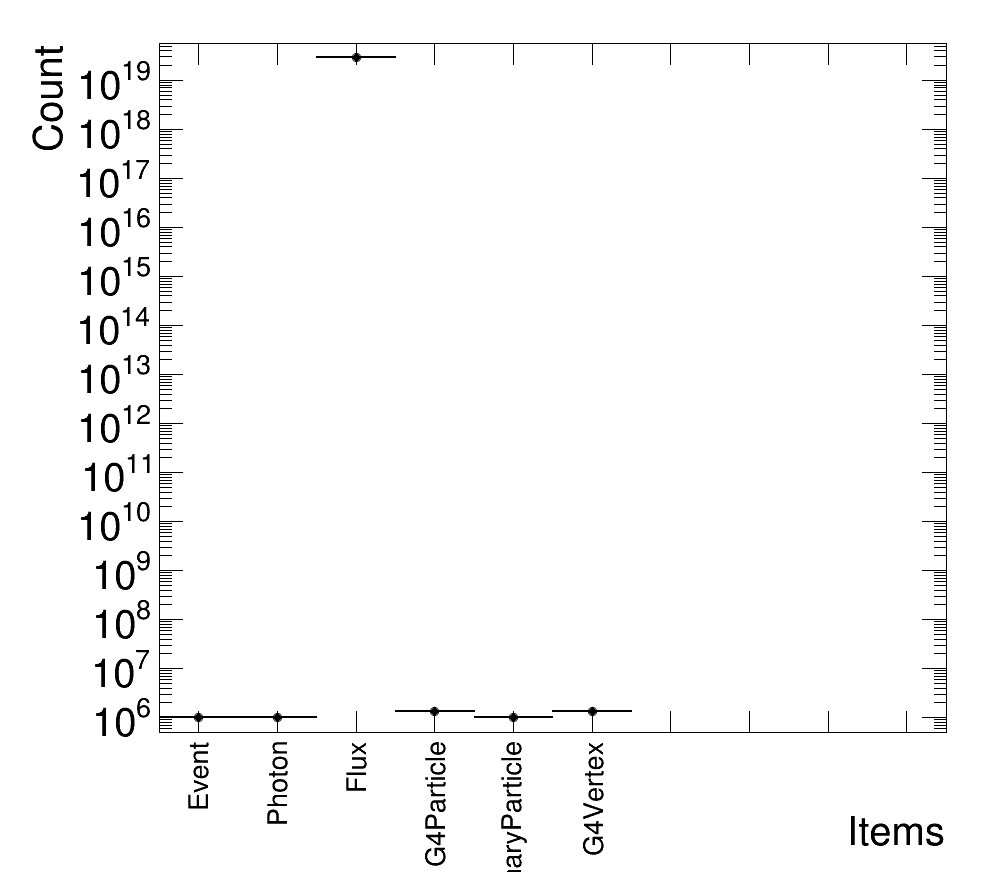

In [14]:
c1 = ROOT.TCanvas( 'Check', 'Check', 1000, 900)
idx = 1;

p = c1.cd(idx);
idx = idx + 1;
c1.Update();
p.SetLogy();

h_SynRadAna_Normalization.Draw();

c1.Draw()

In [13]:
root_file.ls()

TFile**		production-3-full-beam-full-magnet/18987_SUM.csv_SynRadAna.root	
 TFile*		production-3-full-beam-full-magnet/18987_SUM.csv_SynRadAna.root	
  OBJ: TH1D	h_SynRadAna_Normalization	h_SynRadAna_ Normalization : 0 at: 0x7c0daf0
  KEY: TH2D	h_SynRadAna_BH_1_nHit;1	Hit sum
  KEY: TH2D	h_SynRadAna_BH_1_photonEnergy;1	Hit source photon
  KEY: TH2D	h_SynRadAna_BH_1_sumEdep;1	Hit sum energy distribution
  KEY: TH2D	h_SynRadAna_BH_FORWARD_NEG_nHit;1	Hit sum
  KEY: TH2D	h_SynRadAna_BH_FORWARD_NEG_photonEnergy;1	Hit source photon
  KEY: TH2D	h_SynRadAna_BH_FORWARD_NEG_sumEdep;1	Hit sum energy distribution
  KEY: TH2D	h_SynRadAna_BH_FORWARD_PLUS_nHit;1	Hit sum
  KEY: TH2D	h_SynRadAna_BH_FORWARD_PLUS_photonEnergy;1	Hit source photon
  KEY: TH2D	h_SynRadAna_BH_FORWARD_PLUS_sumEdep;1	Hit sum energy distribution
  KEY: TH2D	h_SynRadAna_CEMC_nHit;1	Hit sum
  KEY: TH2D	h_SynRadAna_CEMC_photonEnergy;1	Hit source photon
  KEY: TH2D	h_SynRadAna_CEMC_sumEdep;1	Hit sum energy distribution
  KEY: TH2D	h_